In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import os

In [48]:
def plotHistory(historyName):
    numInvalidActions, numCoinsCollected = pickle.load(open("histories/" + historyName, "rb"))
    
    numEpisodes = len(numInvalidActions)
    numInvalidActions = np.array(numInvalidActions)
    numCoinsCollected = np.array(numCoinsCollected)
    
    fig = plt.figure(figsize=(20,5))

    plt.subplot(1, 2, 1)
    plt.plot(np.arange(numEpisodes), numInvalidActions, label="#invalid", color="red")
    plt.legend(loc=1)

    plt.subplot(1, 2, 2)
    plt.plot(np.arange(numEpisodes), numCoinsCollected, label="#coins", color="gold")
    plt.legend(loc=4)

    plt.show()

In [61]:
def plotLatestHistory():
    list_of_histories = glob.glob('histories/*.pt')
    latest_history_name = max(list_of_histories, key=os.path.getctime)
    plotHistory(os.path.basename(latest_history_name))

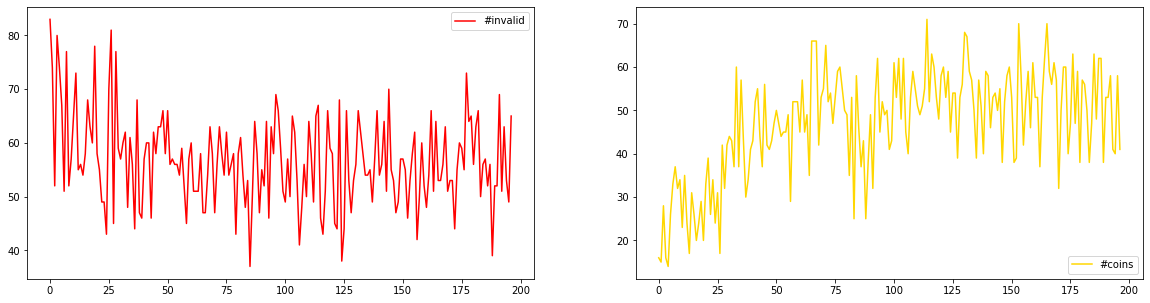

In [62]:
plotLatestHistory()